# [ICTCOG AI Academy] 7기 고급시각저녁반
# 다양한 CNN 모델 (3)

### Network In NEtwork
> 논문 읽는법 Abstact 초록
- 네트워크 안의 네트워크
  - keras에서 모델내에 모델을 합성함수처럼 가능
- Stacking MLPconv layers
 - 비선형성으로 계산 복잡도 증가
 - 큰 성능 향상은 없었음
- model stacking
- 최초로 Dense 대신에 global Average Pooling
  - 얕아도 성능이 충분
- 1x1 convolution으로 차원축소 효과
- 나중에 Google, Inception에서 차용

### VGGNet
### VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION
-  Imagenet localization 1등
- 레이어 갯수에 따른 성능 변화
- 3x3 convolution filters 여러 개 사용
  - 3x3 ~5x5로 충분함을 증명
  - receptive field가 크면 큰 특징을 잘 잡아냄
- VGG 16-19개의 레이어( 단순한 구조 )
  - Transfer Learning 사용하기 좋음
- AlexNet에서의 LRN
- 레이어 갯수,1x1 covolution, LRN 영향에 대해 성능 변화 비교
  - 레이어 깊어진 만큼 파라미터도 급증
  - 비선형성 증가로 성능 향상
  - 1x1 covolution는 하나의 fully conneceted layer와 동일
  - LRN 사용할 필요 없다.

> 오캄의 면도날 : 같은 성능이라면 간단한 것이 좋다.


#### VGG16



In [1]:
import tensorflow as tf

In [ ]:
tf.keras.applications.VGG16()
tf.keras.applications.VGG19(include_top=True) #dense 레이어 가져옴
tf.keras.applications.VGG19(include_top=False)#dense 레이어 가져오지 않음

In [3]:
VGG16=tf.keras.applications.VGG16() 

In [4]:
VGG16.summary() #NIN처럼 stacking개념으로 쌓음

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
from tensorflow.keras.utils import plot_model

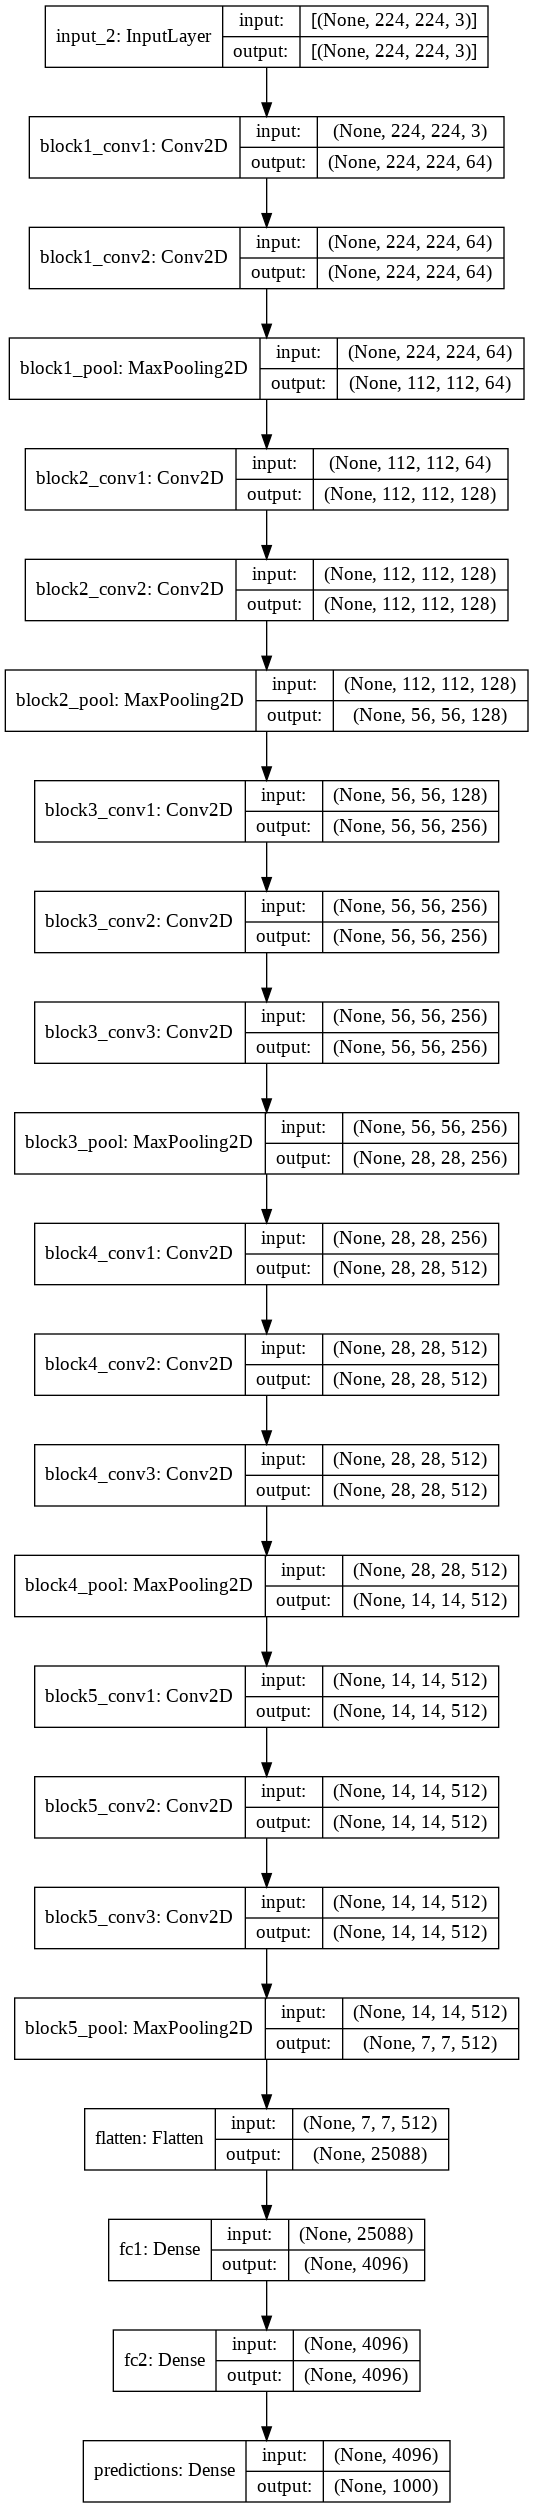

In [9]:
plot_model(VGG16, show_shapes=True) #VGG16시각화

In [11]:
VGG16.layers[1:5] #2,3,4

In [14]:
model1=tf.keras.models.Sequential(VGG16.layers[1:5]) #VGG16의 일부를 가져옴

In [18]:
model1.add(VGG16.layers[12]) #12번쨰 레이어 추가

In [20]:
model1=tf.keras.models.Sequential([
                                   tf.keras.layers.Dense(1)
                                   ])

model2=tf.keras.models.Sequential([
                                   tf.keras.layers.Dense(1)
                                   ])

In [22]:
#모델안에 모델 겹치기
model3= tf.keras.models.Sequential([
                                    model1,
                                    model2
])

- 복잡한 모델은 레이어 커스터마이징 해야함

In [26]:
XC=tf.keras.applications.Xception()

In [25]:
XC.summary() #multi-inputs, outputs 

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

### Inception
### Going Deeper with Convolutions
- 영화 Inception 대사에서 가져옴
- 152개의 레이어
- NIN 을 가져옴
  - 1x1 convolution : 차원축소 , 병목현상 제거
  - stacking

inception module
- multi-inputs, outputs 
- wide
  - dropout과 같은 효과
  - sparse한 구조
- 데이터에 비해 레이어가 깊다고 좋지 않음 (overfitting, underfitting - vanishing gradients)
- maxpooling, padding
- 1x1 convolution
- LRN, 3x3 convolution 사용 
- auxiliary classifier 2개 사용
- Graident banishing : 너무 레이어가 깊으면 underfitting
- Global Average Pooling & Dense 

- 3개 모델들 ensemble 

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

데이터가 적으면 골치아픔

원본
- 디렉토리
  - 클래스 별 저장
- 이미지디비(이미지디비 자체 / 참조 포인트)
- Pandas DataFrame 구축 (참조 포인트)

데이터 변환 형태
- Numpy
  - 
- Tensor
  - 속도 빠름


In [33]:
import os #옛날 버전

In [ ]:
os.path.

In [31]:
import pathlib #시스템 독립적 
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)  #디렉토리 형태

In [32]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


### EDA
- 이미지 

In [36]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [38]:
dir(data_dir)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '_accessor',
 '_cached_cparts',
 '_closed',
 '_cparts',
 '_drv',
 '_flavour',
 '_format_parsed_parts',
 '_from_parsed_parts',
 '_from_parts',
 '_hash',
 '_init',
 '_make_child',
 '_make_child_relpath',
 '_opener',
 '_parse_args',
 '_parts',
 '_pparts',
 '_raise_closed',
 '_raw_open',
 '_root',
 '_str',
 'absolute',
 'anchor',
 'as_posix',
 'as_uri',
 'chmod',
 'cwd',
 'drive',
 'exists',
 'expanduser',
 'glob',
 'group',
 'home',
 'is_absolute',
 'is_block_device',
 'is_char_device',
 'is_dir',
 'is_fifo',
 'is_file',
 'is_mount',
 'is_reserved',
 '

5개의 classes

In [41]:
#generator
t =data_dir.iterdir()

In [42]:
next(t)

PosixPath('/root/.keras/datasets/flower_photos/roses')

In [48]:
for i in data_dir.iterdir(): #5개 클래스 
  print(i)

/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/dandelion
/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/LICENSE.txt


In [54]:
data_dir.glob('*/*.jpg')  #flower_photos 내부의 jpg 이미지만 불러옴 

<generator object Path.glob at 0x7f2d9693dbd0>

In [56]:
len(list(data_dir.glob('*/*.jpg') )) #3670

3670

In [68]:
for i in data_dir.iterdir(): 
  print(str(i).split("/")[-1])

roses
daisy
dandelion
tulips
sunflowers
LICENSE.txt


In [71]:
 #클래스 추출 자동화
class_ =[str(i).split('/')[-1] for i in data_dir.iterdir() if str(i).split('/')[-1] != 'LICENSE.txt' ]

In [72]:
class_

['roses', 'daisy', 'dandelion', 'tulips', 'sunflowers']

In [73]:
for i in class_ : #각 클래스의 갯수
  print(len(list(data_dir.glob(f'{i}/*.jpg')))) #압도적 차이는 없으니 해보고 결정

641
633
898
799
699


이미지 크기 최대, 최소 사이즈 

In [74]:
for i in data_dir.glob('daisy/*.jpg'):
  PIL.Image,open()

<generator object Path.glob at 0x7f2d96f64950>

In [75]:
import PIL

In [76]:
daisys = list(data_dir.glob('daisy/*jpg'))

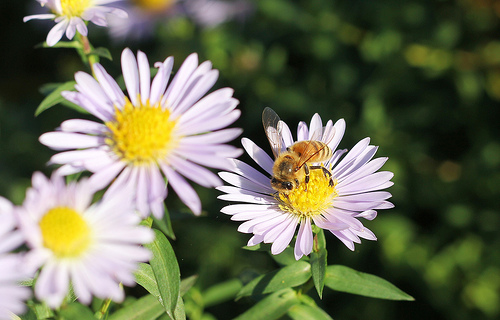

In [81]:
PIL.Image.open(daisys[10]) #데이터 크기 상이함

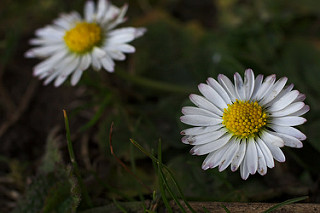

In [79]:
PIL.Image.open(daisys[2])

In [82]:
dir(PIL.Image.open(daisys[2]))

['_Image__transformer',
 '__array_interface__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_close_exclusive_fp_after_loading',
 '_copy',
 '_crop',
 '_dump',
 '_ensure_mutable',
 '_exclusive_fp',
 '_exif',
 '_expand',
 '_get_safe_box',
 '_getexif',
 '_getmp',
 '_min_frame',
 '_new',
 '_open',
 '_repr_png_',
 '_seek_check',
 '_size',
 'alpha_composite',
 'app',
 'applist',
 'bits',
 'category',
 'close',
 'convert',
 'copy',
 'crop',
 'custom_mimetype',
 'decoderconfig',
 'decodermaxblock',
 'draft',
 'effect_spread',
 'entropy',
 'filename',
 'filter',
 'format',
 'format_description',
 'fp'

In [83]:
PIL.Image.open(daisys[2]).width, PIL.Image.open(daisys[2]).height #이미지 가로,세로 

(320, 213)

In [86]:
for i in data_dir.glob('daisy/*.jpg'):
  print(PIL.Image.open(i).width, PIL.Image.open(i).height ) #각 이미지 가로,세로

500 385
320 213
320 213
240 192
159 240
500 313
500 277
320 256
159 240
320 221
500 320
240 240
320 212
240 240
500 333
320 250
320 240
175 240
500 327
320 240
320 261
500 333
320 240
640 255
180 240
320 213
320 263
500 321
320 213
500 333
193 240
240 240
320 240
228 240
500 333
320 240
240 240
320 240
320 221
180 240
500 309
500 332
320 225
500 333
500 429
320 213
500 281
320 240
500 332
500 375
320 213
320 224
320 240
320 240
500 333
320 213
207 240
320 218
180 240
320 240
320 240
320 213
320 240
320 224
221 240
192 240
500 322
500 375
320 240
500 342
500 320
175 240
500 332
320 213
240 240
320 280
500 331
500 332
320 278
500 375
500 375
500 375
240 240
240 240
500 391
500 333
500 333
320 270
500 332
320 256
500 300
180 240
500 333
320 240
240 240
194 240
240 235
500 375
500 333
500 414
240 240
500 375
240 240
320 248
500 375
500 375
500 333
500 374
320 240
240 240
500 333
320 240
197 240
320 213
180 240
500 281
320 213
320 250
231 240
320 240
180 240
500 333
500 375
240 240
240 230


In [89]:
widths = []
heights = []
for i in data_dir.glob('daisy/*.jpg'):
  im = PIL.Image.open(i)
  widths.append(im.width)
  heights.append(im.height)

전략
1. resize (자동)
  - 이미지 왜곡
2. crop (반자동 / 수동)

### holdout
- train,test  split

tf.keras.preprocessing.image_dataset_from_directory
- 간단하게 디렉토리로 holdout 할수 있도록 기능 지원

In [93]:
tf.keras.preprocessing  #전처리

<module 'tensorflow.keras.preprocessing' from '/usr/local/lib/python3.7/dist-packages/tensorflow/keras/preprocessing/__init__.py'>

In [95]:
dir(tf.keras.preprocessing ) #image, image_dataset_from_directory 지원

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'image',
 'image_dataset_from_directory',
 'sequence',
 'text',
 'text_dataset_from_directory',
 'timeseries_dataset_from_array']

- 3670개가 5개 클래스로 나뉨
- 2936개를 학습으로 사용

In [100]:
tf.keras.preprocessing.image_dataset_from_directory( data_dir,
                                                    subset='training',seed=41,validation_split=0.2) 

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

- 라벨, batch size 정하기 가능

In [ ]:
tf.keras.preprocessing.image_dataset_from_directory( data_dir,
                                                    subset='training',seed=41,validation_split=0.2)


tf.keras.preprocessing.image
- 데이터 augmentation 모듈
- 결과물 Tensor

In [ ]:
tf.keras.preprocessing.image. 

In [101]:
import matplotlib.pyplot as plt

In [102]:
dir(tf.keras.preprocessing.image_dataset_from_directory( data_dir,
                                                    subset='training',seed=41,validation_split=0.2) )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_de

generator
- 메모리 효과적 사용

In [104]:
# tf.Tensor: shape=(32, 256, 256, 3)
for i in tf.keras.preprocessing.image_dataset_from_directory( data_dir,
                                                    subset='training',seed=41,validation_split=0.2) :
                                                    print(i)  
                                                    break #0번째 데이터만

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[0.00000000e+00, 0.00000000e+00, 3.50000000e+00],
         [2.25000000e+00, 2.25000000e+00, 1.50000000e+00],
         [2.87500000e+00, 4.75000000e+00, 1.50000000e+00],
         ...,
         [2.25000000e+00, 4.25000000e+00, 1.87500000e+00],
         [2.25000000e+00, 3.62500000e+00, 1.87500000e+00],
         [0.00000000e+00, 1.25000000e-01, 6.12500000e+00]],

        [[2.02539062e+00, 2.26367188e+00, 1.64062500e-01],
         [1.89257812e+00, 3.08398438e+00, 7.03125000e-02],
         [2.51757812e+00, 8.18359375e-01, 1.07929688e+01],
         ...,
         [4.62890625e-01, 1.62890625e+00, 6.64062500e+00],
         [2.84570312e+00, 6.36523438e+00, 8.78906250e-02],
         [1.31054688e+00, 1.79296875e+00, 1.12109375e+00]],

        [[2.81250000e-01, 3.00781250e-01, 0.00000000e+00],
         [7.22656250e-01, 8.20312500e-01, 0.00000000e+00],
         [

In [106]:
len(tf.keras.preprocessing.image_dataset_from_directory( data_dir,
                                                    subset='training',seed=41,validation_split=0.2))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


92

take
- 랜덤하게 한 개 선택

In [107]:
tf.keras.preprocessing.image_dataset_from_directory( data_dir,
                                                    subset='training',seed=41,validation_split=0.2).take(1)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [110]:
for i in tf.keras.preprocessing.image_dataset_from_directory( data_dir,
                                                    subset='training',seed=41,validation_split=0.2).take(1):
  print(len(i)) #2개

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
2


In [111]:
for i in tf.keras.preprocessing.image_dataset_from_directory( data_dir,
                                                    subset='training',seed=41,validation_split=0.2).take(1):
  print(i[1]) #클래스 

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
tf.Tensor([1 1 4 3 1 1 1 0 1 3 1 4 4 0 2 2 1 4 1 2 4 1 1 2 3 0 4 3 1 0 1 1], shape=(32,), dtype=int32)


In [112]:
for i in tf.keras.preprocessing.image_dataset_from_directory( data_dir,
                                                    subset='training',seed=41,validation_split=0.2).take(1):
  print(i[0]) #데이터 

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
tf.Tensor(
[[[[0.00000000e+00 0.00000000e+00 3.50000000e+00]
   [2.25000000e+00 2.25000000e+00 1.50000000e+00]
   [2.87500000e+00 4.75000000e+00 1.50000000e+00]
   ...
   [2.25000000e+00 4.25000000e+00 1.87500000e+00]
   [2.25000000e+00 3.62500000e+00 1.87500000e+00]
   [0.00000000e+00 1.25000000e-01 6.12500000e+00]]

  [[2.02539062e+00 2.26367188e+00 1.64062500e-01]
   [1.89257812e+00 3.08398438e+00 7.03125000e-02]
   [2.51757812e+00 8.18359375e-01 1.07929688e+01]
   ...
   [4.62890625e-01 1.62890625e+00 6.64062500e+00]
   [2.84570312e+00 6.36523438e+00 8.78906250e-02]
   [1.31054688e+00 1.79296875e+00 1.12109375e+00]]

  [[2.81250000e-01 3.00781250e-01 0.00000000e+00]
   [7.22656250e-01 8.20312500e-01 0.00000000e+00]
   [1.95312500e-01 4.88281250e-02 3.75976562e+00]
   ...
   [2.92968750e-02 1.03906250e+00 2.26562500e+00]
   [2.24609375e-01 1.42968750e+00 0.00000000e+00]
   [1.72070312e+00 1.87500000e+00 6.835937